# Baseline Experiment 2: Training Random Forest Classifier

Using Grid Search with 5-fold Cross-Validation, with a 80/20 train/test split.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix 

# For reproducible results
RANDOM_STATE_SEED = 420

In [2]:
df_dataset = pd.read_csv("/mnt/d/project-chau/cse-cic-ids2018/repo/processed_first_final_dataset_benign_malicious_of_10_days_2.csv", low_memory=False)

In [3]:
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_6,Protocol_17,Flow ID,Src IP,Src Port,Dst IP,Label
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,0.0,539.000000,655.432936,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,192.0,152.0,63.655975,49.510203,0.0,1460.0,254.470588,474.712955,225352.389700,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,270.375000,61.444444,539.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.0,553.0,7.0,3773.0,8192.0,119.0,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,0.0,0.000000,0.000000,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,40.0,20.0,7117.437722,3558.718861,0.0,38.0,19.000000,21.939310,481.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.333333,19.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,1.0,0.0,123.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,0.0,701.800000,636.314186,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,232.0,312.0,39.310424,53.605123,0.0,1460.0,430.111111,566.234209,320621.179500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,446.653846,98.727273,701.800000,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1086.0,15.0,10527.0,8192.0,1047.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,40.0,0.0,15151.515150,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,256.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,0.0,472.384615,611.180489,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,192.0,272.0,32.844797,47.442485,0.0,1460.0,322.869565,497.254764,247262.300400,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,337.545455,142.777778,472.384615,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1285.0,13.0,6141.0,8192.0,1047.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294410,2453.0,1.0,1.0,32.0,70.0,32.0,32.0,32.000000,0.000000,70.0,70.0,70.000000,0.000000,2453.000000,0.000000,2453.0,2453.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,8.0,8.0,407.664085,407.664085,32.0,70.0,44.666667,21.939310,481.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.000000,32.000

In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294415 entries, 0 to 294414
Data columns (total 77 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      294415 non-null  float64
 1   Tot Fwd Pkts       294415 non-null  float64
 2   Tot Bwd Pkts       294415 non-null  float64
 3   TotLen Fwd Pkts    294415 non-null  float64
 4   TotLen Bwd Pkts    294415 non-null  float64
 5   Fwd Pkt Len Max    294415 non-null  float64
 6   Fwd Pkt Len Min    294415 non-null  float64
 7   Fwd Pkt Len Mean   294415 non-null  float64
 8   Fwd Pkt Len Std    294415 non-null  float64
 9   Bwd Pkt Len Max    294415 non-null  float64
 10  Bwd Pkt Len Min    294415 non-null  float64
 11  Bwd Pkt Len Mean   294415 non-null  float64
 12  Bwd Pkt Len Std    294415 non-null  float64
 13  Flow IAT Mean      294415 non-null  float64
 14  Flow IAT Std       294415 non-null  float64
 15  Flow IAT Max       294415 non-null  float64
 16  Fl

In [5]:
# replace nan with 0 
df_dataset.fillna(0, inplace=True) 

# replace inf with 0
df_dataset.replace([np.inf, -np.inf], 0)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_6,Protocol_17,Flow ID,Src IP,Src Port,Dst IP,Label
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,0.0,539.000000,655.432936,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,192.0,152.0,63.655975,49.510203,0.0,1460.0,254.470588,474.712955,225352.389700,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,270.375000,61.444444,539.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.0,553.0,7.0,3773.0,8192.0,119.0,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,0.0,0.000000,0.000000,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,40.0,20.0,7117.437722,3558.718861,0.0,38.0,19.000000,21.939310,481.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.333333,19.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,1.0,0.0,123.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,0.0,701.800000,636.314186,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,232.0,312.0,39.310424,53.605123,0.0,1460.0,430.111111,566.234209,320621.179500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,446.653846,98.727273,701.800000,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1086.0,15.0,10527.0,8192.0,1047.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,40.0,0.0,15151.515150,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,256.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,0.0,472.384615,611.180489,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,192.0,272.0,32.844797,47.442485,0.0,1460.0,322.869565,497.254764,247262.300400,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,337.545455,142.777778,472.384615,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1285.0,13.0,6141.0,8192.0,1047.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294410,2453.0,1.0,1.0,32.0,70.0,32.0,32.0,32.000000,0.000000,70.0,70.0,70.000000,0.000000,2453.000000,0.000000,2453.0,2453.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,8.0,8.0,407.664085,407.664085,32.0,70.0,44.666667,21.939310,481.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.000000,32.000000,70.000000,0.0,0.0,0.0,0.0,

In [6]:
columns_to_drop = [
    'Dst IP',
    'Flow ID',
    'Src IP'
]

df_dataset.drop(columns=columns_to_drop, inplace=True)

In [7]:
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_6,Protocol_17,Src Port,Label
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,0.0,539.000000,655.432936,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,192.0,152.0,63.655975,49.510203,0.0,1460.0,254.470588,474.712955,225352.389700,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,270.375000,61.444444,539.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.0,553.0,7.0,3773.0,8192.0,119.0,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,0.0,0.000000,0.000000,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,40.0,20.0,7117.437722,3558.718861,0.0,38.0,19.000000,21.939310,481.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.333333,19.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,1.0,0.0,123.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,0.0,701.800000,636.314186,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,232.0,312.0,39.310424,53.605123,0.0,1460.0,430.111111,566.234209,320621.179500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,446.653846,98.727273,701.800000,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1086.0,15.0,10527.0,8192.0,1047.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,40.0,0.0,15151.515150,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,256.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,0.0,472.384615,611.180489,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,192.0,272.0,32.844797,47.442485,0.0,1460.0,322.869565,497.254764,247262.300400,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,337.545455,142.777778,472.384615,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1285.0,13.0,6141.0,8192.0,1047.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294410,2453.0,1.0,1.0,32.0,70.0,32.0,32.0,32.000000,0.000000,70.0,70.0,70.000000,0.000000,2453.000000,0.000000,2453.0,2453.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,8.0,8.0,407.664085,407.664085,32.0,70.0,44.666667,21.939310,481.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.000000,32.000000,70.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,1.0,70.0,-1.0,-1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,

### 1- Making an 80/20 train/test split

In [8]:
train, test = train_test_split(df_dataset, test_size=0.2, random_state=RANDOM_STATE_SEED)

In [9]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_6,Protocol_17,Src Port,Label
86006,1007371.0,3.0,4.0,20.0,964.0,20.0,0.0,6.666667,11.547005,964.0,0.0,241.000000,482.000000,1.678952e+05,4.110660e+05,1006980.0,2.0,350.0,1.750000e+02,2.446589e+02,348.0,2.0,1007366.0,3.357887e+05,5.812688e+05,1006980.0,34.0,72.0,92.0,2.978049,3.970732,0.0,964.0,123.000000,339.887376,115523.428600,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,140.571429,6.666667,241.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0,4.0,964.0,8192.0,211.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0,0.0,51817.0,1
245746,21778.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.177800e+04,0.000000e+00,21778.0,21778.0,21778.0,2.177800e+04,0.000000e+00,21778.0,21778.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,40.0,0.0,91.835798,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,32738.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0,0.0,0.0,1
227724,104001609.0,7.0,0.0,224.0,0.0,32.0,32.0,32.000000,0.000000,0.0,0.0,0.000000,0.000000,1.730000e+07,1.400000e+07,45000000.0,6005479.0,104000000.0,1.730000e+07,1.400000e+07,45000000.0,6005479.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,56.0,0.0,0.067307,0.000000,32.0,32.0,32.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.571429,32.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.0,224.0,0.0,0.0,-1.0,-1.0,6.0,8.0,0.0,0.0,0.0,0.0,17300000.0,1.400000e+07,45000000.0,6005479.0,0.0,1.0,0.0,0
241146,11625.0,3.0,4.0,268.0,935.0,268.0,0.0,89.333333,154.729872,935.0,0.0,233.750000,467.500000,1.937500e+03,4.319270e+03,10743.0,4.0,11021.0,5.510500e+03,7.399872e+03,10743.0,278.0,11618.0,3.872667e+03,6.193627e+03,11018.0,37.0,72.0,92.0,258.064516,344.086022,0.0,935.0,150.375000,330.615849,109306.839300,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,171.857143,89.333333,233.750000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,268.0,4.0,935.0,65535.0,219.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0,0.0,0.0,1
79560,60523582.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,6.052358e+07,0.000000e+00,60523582.0,60523582.0,60523582.0,6.052358e+07,0.000000e+00,60523582.0,60523582.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.033045,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,60523582.0,0.000000e+00,60523582.0,60523582.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178094,5499848.0,4.0,4.0,97.0,232.0,97.0,0.0,24.250000,48.500000,232.0,0.0,58.000000,116.000000,7.856926e+05,2.044583e+06,5421913.0,41.0,77935.0,2.597833e+04,4.470398e+04,77598.0,110.0,5499662.0,1.833221e+06,3.174758e+06,5499115.0,195.0,92.0,92.0,0.727

In [10]:
test

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_6,Protocol_17,Src Port,Label
13268,10443.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,0.0,32.250000,53.767245,1.740500e+03,3.867560e+03,9627.0,1.0,500.0,2.500000e+02,2.828427e+02,450.0,50.0,10013.0,3.337667e+03,5.450105e+03,9627.0,1.0,72.0,92.0,287.273772,383.031696,0.0,326.0,56.875000,115.406657,13318.696430,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,65.000000,108.666667,32.250000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,326.0,4.0,129.0,8192.0,219.0,1.0,20.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1
93416,1054019.0,3.0,4.0,20.0,964.0,20.0,0.0,6.666667,11.547005,964.0,0.0,241.000000,482.000000,1.756698e+05,4.301026e+05,1053613.0,2.0,379.0,1.895000e+02,2.651650e+02,377.0,2.0,1054012.0,3.513373e+05,6.081886e+05,1053613.0,23.0,72.0,92.0,2.846249,3.794998,0.0,964.0,123.000000,339.887376,115523.428600,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,140.571429,6.666667,241.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0,4.0,964.0,8192.0,211.0,1.0,20.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,52441.0,1
288324,712865.0,5.0,5.0,373.0,172.0,140.0,0.0,74.600000,70.283711,133.0,0.0,34.400000,57.648070,7.920722e+04,8.737173e+04,186168.0,34.0,712800.0,1.782000e+05,1.323807e+05,319198.0,34.0,712811.0,1.782028e+05,1.209505e+05,307734.0,15660.0,112.0,112.0,7.013951,7.013951,0.0,140.0,49.545455,63.081477,3979.272727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,54.500000,74.600000,34.400000,0.0,0.0,0.0,0.0,0.0,0.0,5.0,373.0,5.0,172.0,8192.0,0.0,3.0,20.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0
265201,9798.0,5.0,2.0,935.0,333.0,935.0,0.0,187.000000,418.144712,333.0,0.0,166.500000,235.466558,1.633000e+03,3.681092e+03,9141.0,7.0,9798.0,2.449500e+03,4.701782e+03,9500.0,7.0,9141.0,9.141000e+03,0.000000e+00,9141.0,9141.0,124.0,40.0,510.308226,204.123290,0.0,935.0,158.500000,334.693036,112019.428600,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,181.142857,187.000000,166.500000,0.0,0.0,0.0,0.0,0.0,0.0,5.0,935.0,2.0,333.0,65535.0,32768.0,1.0,20.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0
16024,11232.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,0.0,32.250000,53.767245,1.872000e+03,4.168174e+03,10372.0,0.0,517.0,2.585000e+02,2.906209e+02,464.0,53.0,10790.0,3.596667e+03,5.871332e+03,10372.0,0.0,72.0,92.0,267.094017,356.125356,0.0,326.0,56.875000,115.406657,13318.696430,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,65.000000,108.666667,32.250000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,326.0,4.0,129.0,8192.0,219.0,1.0,20.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253017,2788.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.788000e+03,0.000000e+00,2788.0,2788.0,2788.0,2.788000e+03,0.000000e+00,2788.0,2788.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,40.0,0.0,717.36

### 2- Checking label distribution

In [11]:
print("Full dataset:\n")
print("Benign: " + str(df_dataset["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_dataset["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 147210
Malicious: 147205
---------------
Training set:

Benign: 117544
Malicious: 117988
---------------
Test set:

Benign: 29666
Malicious: 29217


### 3- Splitting to X_train, y_train, X_test, y_test

In [12]:
y_train = np.array(train.pop("Label")) # pop removes "Label" from the dataframe
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(235532, 73)
(235532,)


In [13]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(58883, 73)
(58883,)


### 4- Fitting Random Forest model

In [14]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [50, 75, 100, 125, 150]
}

In [15]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [16]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 75, 100, 125, 150]}, verbose=1)

### 5- Extracting best performing model in the 5-fold cross-validation Grid Search

In [17]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.9597889022065557
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 100}
---------------
RandomForestClassifier()


In [18]:
model = clf.best_estimator_

In [19]:
model

RandomForestClassifier()

### 6- Evaluating on Test set

In [20]:
predictions = model.predict(X_test)

In [21]:
predictions

array([1, 1, 0, ..., 0, 1, 0])

#### 6.1 Accuracy on Test set

In [22]:
print(accuracy_score(y_test, predictions))

0.9598016405414126


#### 6.2 Confusion matrix

In [23]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[28850   816]
 [ 1551 27666]]


/mnt/d/tool/miniconda-repo/envs/torch_with_cudagpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


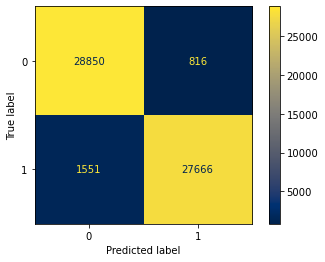

In [24]:
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")

In [25]:
# confusion matrix 
# 0 : benign, 1 : attack 

# true negative TN

print("True Negative TN : ", cm[0][0])

# false positive FP

print("False Positive FP : ", cm[0][1])

# false negative FN

print("False Negative FN : ", cm[1][0])

# true positive TP

print("True Positive TP : ", cm[1][1])

True Negative TN :  28850
False Positive FP :  816
False Negative FN :  1551
True Positive TP :  27666


In [26]:
# detection rate DR = (TP_attack)/(TP_attack + FN_attack)

print("Detection Rate is : ", (cm[1][1])/(cm[1][1]+cm[1][0])*100)

# False Alarm Rate FAR = (FP_benign)/(TN_benign + FP_benign)

print("False Alarm Rate is : ", (cm[0][1])/(cm[0][1]+cm[0][0])*100)


Detection Rate is :  94.69144676044769
False Alarm Rate is :  2.750623609519315


#### 6.3 Classification report

In [27]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.94898   0.97249   0.96059     29666
           1    0.97135   0.94691   0.95898     29217

    accuracy                        0.95980     58883
   macro avg    0.96017   0.95970   0.95979     58883
weighted avg    0.96008   0.95980   0.95979     58883



### 7- Saving model

In [28]:
joblib.dump(model, "trained_models/random-forest-classifier.pkl")

['trained_models/random-forest-classifier.pkl']

### 8- Testing loading model

In [29]:
model = joblib.load("trained_models/random-forest-classifier.pkl")

In [30]:
model

RandomForestClassifier()